In [1]:
# !pip install matplotlib
# !pip install PIL
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Loding, Resizing and Normalizing the data

In [2]:
def load_data(data_path, width, height):

    classes = os.listdir(data_path)
    class_to_text = {i: class_name for i, class_name in enumerate(classes)}

    images = []
    labels = []

    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            img = Image.open(image_path).resize((width, height))  # Resize image
            img = np.array(img)
            normalized_images = img / 255.0
            images.append(normalized_images)
            labels.append(class_to_text[classes.index(class_name)])

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [3]:
data_path = "animals"
images, labels = load_data(data_path, 128, 128)

In [4]:
print(labels)

['antelope' 'antelope' 'antelope' ... 'zebra' 'zebra' 'zebra']


In [5]:
unique_labels = np.unique(labels)
print(unique_labels)

['antelope' 'badger' 'bat' 'bear' 'bee' 'beetle' 'bison' 'boar'
 'butterfly' 'cat' 'caterpillar' 'chimpanzee' 'cockroach' 'cow' 'coyote'
 'crab' 'crow' 'deer' 'dog' 'dolphin' 'donkey' 'dragonfly' 'duck' 'eagle'
 'elephant' 'flamingo' 'fly' 'fox' 'goat' 'goldfish' 'goose' 'gorilla'
 'grasshopper' 'hamster' 'hare' 'hedgehog' 'hippopotamus' 'hornbill'
 'horse' 'hummingbird' 'hyena' 'jellyfish' 'kangaroo' 'koala' 'ladybugs'
 'leopard' 'lion' 'lizard' 'lobster' 'mosquito' 'moth' 'mouse' 'octopus'
 'okapi' 'orangutan' 'otter' 'owl' 'ox' 'oyster' 'panda' 'parrot'
 'pelecaniformes' 'penguin' 'pig' 'pigeon' 'porcupine' 'possum' 'raccoon'
 'rat' 'reindeer' 'rhinoceros' 'sandpiper' 'seahorse' 'seal' 'shark'
 'sheep' 'snake' 'sparrow' 'squid' 'squirrel' 'starfish' 'swan' 'tiger'
 'turkey' 'turtle' 'whale' 'wolf' 'wombat' 'woodpecker' 'zebra']


Image preprocessing is a crucial step in preparing image data for machine learning models. The specific procedures you follow can depend on the characteristics of your dataset and the requirements of your model. However, here are common preprocessing steps that are often applied:

Resize images to a standard size. This ensures consistency in input dimensions for your model.
Cropping can be used to focus on the relevant part of the image.
Normalization:

Scale pixel values to a standard range (e.g., [0, 1] or [-1, 1]).
Normalization helps models converge faster during training.
Data Augmentation:

Generate new training samples by applying random transformations to existing images (e.g., rotation, flipping, zooming).
Data augmentation helps improve model generalization and robustness.
Grayscale Conversion:

Convert color images to grayscale if color information is not essential for your task.
This reduces computational complexity and can be beneficial if color is not informative.
Histogram Equalization:

Enhance contrast in images by applying histogram equalization.
This can be useful in scenarios where images have low contrast.
Noise Reduction:

Apply filters or techniques to reduce noise in images.
Common methods include Gaussian smoothing or median filtering.
Standardization:

Subtract the mean and divide by the standard deviation of pixel values.
Standardization helps when features have different ranges.
Channel-wise Scaling:

If working with color images, scale pixel values independently for each color channel.
This can help balance the contribution of different color channels.
Image Segmentation:

Identify and separate different objects or regions within an image.
Useful for tasks where understanding the structure of an image is important.
Handling Missing Values:

If your images have missing or corrupted regions, decide how to handle these cases.
Techniques include interpolation or filling missing values with a specific color.
Feature Engineering:

Extract relevant features from images that can improve model performance.
For example, extract edges, corners, or other high-level features.
Conversion to Gradients:

Represent images as gradients (e.g., using Sobel or Scharr operators).
This can capture important texture information.
Data Cleaning:

Remove duplicate or irrelevant images from your dataset.
Ensure that your dataset is clean and well-organized.
Handling Imbalanced Classes:

If your dataset has imbalanced class distribution, consider strategies like oversampling, undersampling, or using class weights during training.
Quality Checks:

Inspect images for anomalies, artifacts, or incorrect labels.
Remove images that might negatively impact model training.

In [6]:
from sklearn.preprocessing import LabelEncoder

class_to_numeric = {class_name: i for i, class_name in enumerate(np.unique(labels))}

# Map the original labels to their corresponding numerical values
numeric_labels = [class_to_numeric[label] for label in labels]

numeric_labels = np.array(numeric_labels, dtype=np.int32)

# Print the original labels and their corresponding numerical values
for original_label, numeric_label in zip(labels, numeric_labels):
    print(f'{original_label} -> {numeric_label}')

antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
antelope -> 0
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badger -> 1
badg

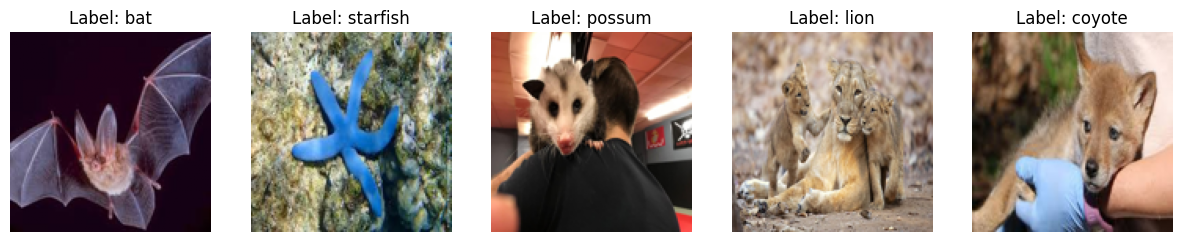

In [7]:
# Define the number of images to visualize
num_images_to_visualize = 5

# Get random indices for visualization
indices_to_visualize = np.random.choice(len(images), num_images_to_visualize, replace=False)

# Plot the images
plt.figure(figsize=(15, 5))
for i, index in enumerate(indices_to_visualize, 1):
    plt.subplot(1, num_images_to_visualize, i)
    plt.imshow(images[index])
    plt.title(f"Label: {labels[index]}")
    plt.axis('off')

plt.show()

In [8]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [9]:
# !pip install tensorflow
# !pip install sklearn
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Enable eager execution explicitly
tf.compat.v1.enable_eager_execution()
# Dividing it into train and test data

x_train, x_test, y_train, y_test = train_test_split(images, numeric_labels, test_size = 0.2)
print(y_train)



[51 89 80 ...  2  1 74]


In [10]:
# Example usage:
input_shape = (128, 128,3) 
num_classes = 90 

model = create_cnn_model(input_shape, num_classes)
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)      

In [11]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5

135/135 [==============================] - 22s 152ms/step - loss: 4.5041 - accuracy: 0.0106 - val_loss: 4.5013 - val_accuracy: 0.0083
Epoch 2/5
135/135 [==============================] - 20s 147ms/step - loss: 4.4696 - accuracy: 0.0150 - val_loss: 4.3588 - val_accuracy: 0.0222
Epoch 3/5
135/135 [==============================] - 20s 152ms/step - loss: 4.3266 - accuracy: 0.0273 - val_loss: 4.2744 - val_accuracy: 0.0324
Epoch 4/5
135/135 [==============================] - 21s 156ms/step - loss: 4.2029 - accuracy: 0.0431 - val_loss: 4.1793 - val_accuracy: 0.0546
Epoch 5/5
135/135 [==============================] - 24s 177ms/step - loss: 4.0787 - accuracy: 0.0537 - val_loss: 4.0440 - val_accuracy: 0.0667


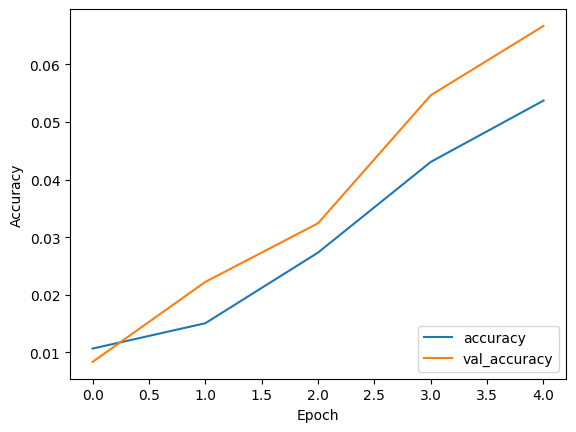

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

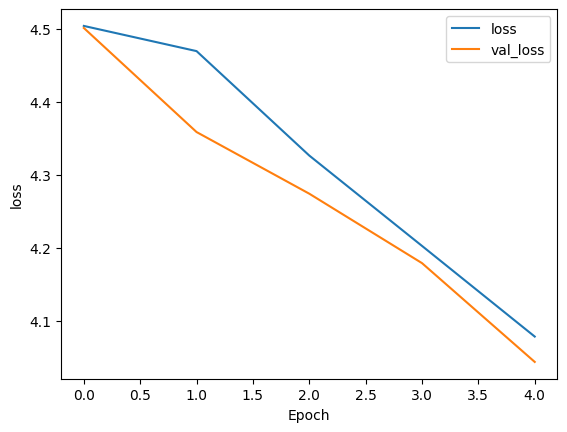

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

In [14]:
model.save('animal_weights.h5')

C:\Users\YOGA 6 13ARE05\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import os
import json

# Assuming you have a dataset folder with subfolders for each class
dataset_path = "animals"

# Function to get unique class names and labels
def get_unique_classes(dataset_path):
    unique_classes = {}

    classes = sorted(os.listdir(dataset_path))

    for class_label, class_name in enumerate(classes):
        unique_classes[class_name] = class_label

    return {"classes": unique_classes}

# Get unique class names and labels
unique_classes_info = get_unique_classes(dataset_path)

# Convert to JSON
json_info = json.dumps(unique_classes_info, indent=2)

# Save to a JSON file
json_file_path = "labels.json"
with open(json_file_path, "w") as json_file:
    json_file.write(json_info)

print(f"Unique classes info saved to {json_file_path}")


Unique classes info saved to labels.json
